In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [ ]:
fraction=0.6
pca = PCA(fraction)
projected_data = pca.fit_transform(mnist.data)
pca.n_components_

17

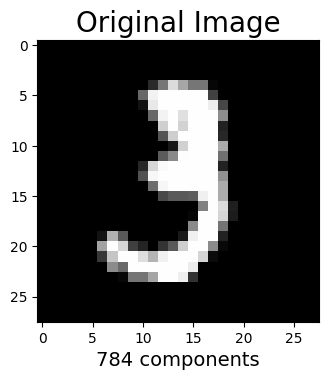

In [ ]:
plt.figure(figsize=(8,4));

# Original Image
A = mnist.data.to_numpy()
plt.subplot(1, 2, 1);
plt.imshow(A[10].reshape(28,28),cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);


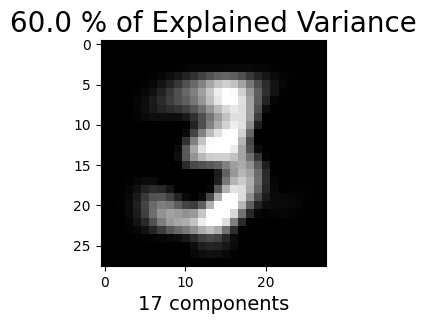

In [ ]:

# After PCA compression
fuzzyfig = pca.inverse_transform(projected_data)
plt.subplot(1, 2, 2);
plt.imshow(fuzzyfig[10].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('{0} components'.format(pca.n_components_), fontsize = 14)
plt.title('{0:02.1f} % of Explained Variance'.format(fraction*100), fontsize = 20);

In [ ]:
# Now calculate PCA transform on testimages only (else cheating)
# But first apply a standardscaler
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


In [ ]:
# Do full PCA
pca = PCA()
pca.fit(train_img)
pca.n_components_

784

In [ ]:
# Plot explained variance when we keep different nr of PCA components
# The result will be different from before, because of the standardscaler
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

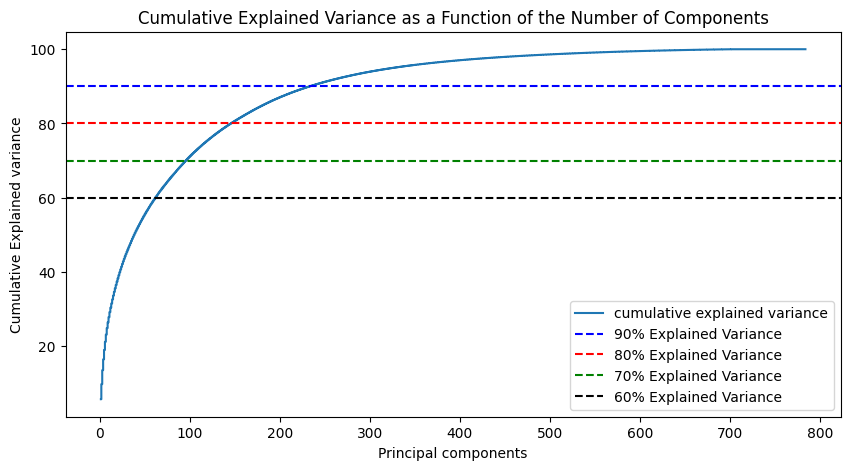

In [ ]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='b', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 80, color='r', linestyle='--', label = '80% Explained Variance')
plt.axhline(y = 70, color='g', linestyle='--', label = '70% Explained Variance')
plt.axhline(y = 60, color='k', linestyle='--', label = '60% Explained Variance')
plt.legend(loc='best')
plt.savefig('pcamnist01.pdf')
plt.show()

In [ ]:
# Lets see how logistic regression works on compressed images
# Try different values below on compression factor
# If we were clever, we could have reused the full PCA calculation from before
pca = PCA(.85)
pca.fit(train_img)
train_imgpca = pca.transform(train_img)
test_imgpca = pca.transform(test_img)
pca.n_components_

182

In [ ]:
logisticRegr = LogisticRegression(max_iter=10000,tol=0.001,verbose=1)

In [ ]:
logisticRegr.fit(train_imgpca, train_lbl)

LogisticRegression(max_iter=10000, tol=0.001, verbose=1)

In [ ]:
logisticRegr.score(test_imgpca, test_lbl)

0.9197